# Importing libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir  ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
mv kaggle.json /root/.kaggle/


mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


# Downloading dataset

In [ ]:
!kaggle datasets download -d aryashah2k/indian-medicinal-leaves-dataset

Dataset URL: https://www.kaggle.com/datasets/aryashah2k/indian-medicinal-leaves-dataset
License(s): CC-BY-NC-SA-4.0
100% 8.99G/9.00G [01:45<00:00, 134MB/s]
100% 9.00G/9.00G [01:45<00:00, 91.6MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5611.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5612.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5613.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5614.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5615.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5616.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5617.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5618.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5619.jpg  
  inflating: Indian Medicinal Leaves Image Datasets/Medicinal plant dataset/Avacado/5620.jpg  

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
import cv2
import os
import numpy as np

In [ ]:
dataset_path= 'Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset'

In [ ]:
class_names = sorted(os.listdir(dataset_path))

# Print the class names
print(class_names)

['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Jasmine', 'Kambajala', 'Kasambruga', 'Kohlrabi', 'Lantana', 'Lemon', 'Lemongrass', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomoegranate', 'Pumpkin', 'Raddish', 'Rose', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 'ashoka', 'camphor', 'kamakasturi', 'kepala']


In [ ]:
def load_and_preprocess_images(dataset_path, image_size=(128, 128)):
    images = []
    labels = []

    for class_dir in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_dir)
        class_label = int(class_dir)  
        
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)


            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.astype(np.float32) / 255.0 
            images.append(image)
            labels.append(class_label)

    return np.array(images), np.array(labels)


# **Transfer Learning with MobileNet Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

IMAGE_RES = 224
BATCH_SIZE = 32
data = tf.keras.utils.image_dataset_from_directory(
    'Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset',
    image_size=(IMAGE_RES, IMAGE_RES),
    batch_size=BATCH_SIZE,
    validation_split=0.2, 
    subset="training",     
    seed=42,
    label_mode='int'
)
num_examples = data.cardinality().numpy()
num_classes = len(data.class_names)

testing_data = tf.keras.utils.image_dataset_from_directory(
    'Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset',
    image_size=(IMAGE_RES, IMAGE_RES),
    batch_size=BATCH_SIZE,
    validation_split=0.2,  
    seed=42,
    label_mode='int',
    subset="validation"    
)

Found 6900 files belonging to 80 classes.
Using 5520 files for training.
Found 6900 files belonging to 80 classes.
Using 1380 files for validation.


In [ ]:

IMAGE_RES = 224  
BATCH_SIZE = 32

# Training Model

In [ ]:
def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES)) / 255.0
    return image, label
train_data = data
validation_split = 0.2
num_validation_samples = int(num_examples * validation_split)
validation_data = data.take(num_validation_samples)

train_batches = train_data.map(format_image).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validation_batches = validation_data.map(format_image).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMAGE_RES, IMAGE_RES, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes, activation='softmax')

model = tf.keras.Sequential([
    base_model,
    global_average_layer,
    prediction_layer
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(train_batches, validation_data=validation_batches, epochs=10)

model.save('medicinal_leaf_model.h5')
testing_batches = testing_data.map(format_image).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_loss, test_accuracy = model.evaluate(testing_batches)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

Epoch 1/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 479s 3s/step - accuracy: 0.2790 - loss: 3.2878 - val_accuracy: 0.7721 - val_loss: 1.0132
Epoch 2/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.8131 - loss: 0.8827 - val_accuracy: 0.8787 - val_loss: 0.5627
Epoch 3/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.9110 - loss: 0.5094 - val_accuracy: 0.9366 - val_loss: 0.3600
Epoch 4/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.9480 - loss: 0.3358 - val_accuracy: 0.9715 - val_loss: 0.2498
Epoch 5/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.9736 - loss: 0.2368 - val_accuracy: 0.9844 - val_loss: 0.1843
Epoch 6/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.9865 - loss: 0.1747 - val_accuracy: 0.9899 - val_loss: 0.1418
Epoch 7/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.9906 - loss: 0.1332 - val_accuracy: 0.9926 - val_loss: 0.1122
Epoch 8/10
173/173 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.9949 - loss: 0.1042 - val_accu

44/44 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8726 - loss: 0.4482
Test Accuracy: 0.865217387676239
Test Loss: 0.45230376720428467


# Model's Description

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 80)                  │         102,480 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,565,426 (9.79 MB)

 Trainable params: 102,480 (400.31 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 204,962 (800.64 KB)

# Plot for training and validation

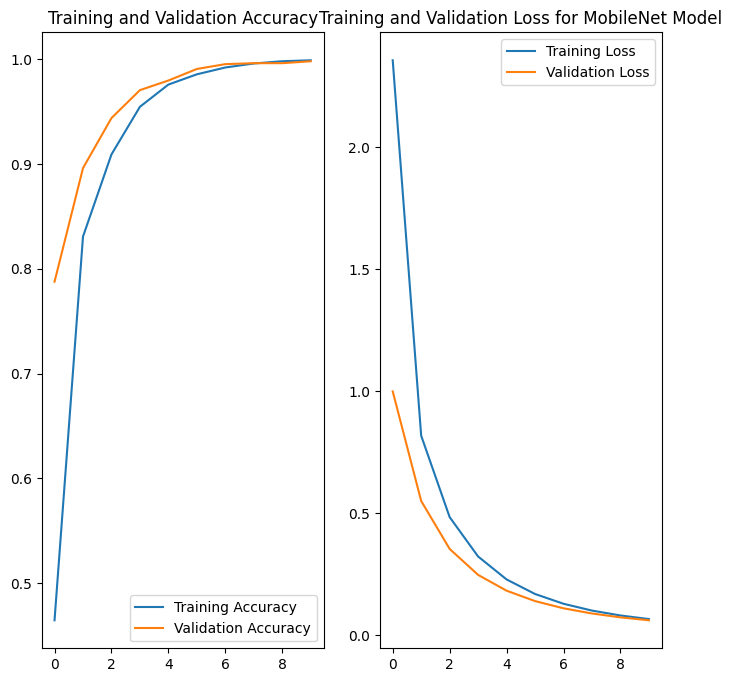

In [ ]:
EPOCHS = 10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for MobileNet Model')
plt.show()

# **Prediction**

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


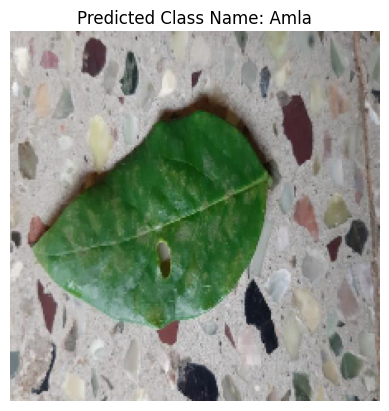

In [ ]:
input_image_path = '/content/amla.jpg'
input_image = load_img(input_image_path, target_size=(IMAGE_RES, IMAGE_RES))
input_image_array = img_to_array(input_image)
input_image_array = input_image_array / 255.0  # Normalize the image
input_image_array = input_image_array[tf.newaxis, ...]
predictions = model.predict(input_image_array)
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
predicted_class_name = data.class_names[predicted_class_index]
plt.imshow(input_image)
plt.title("Predicted Class Name: " + predicted_class_name)
plt.axis("off")
plt.show()

In [ ]:
input_image_path = '/content/castor.jpg'
input_image = load_img(input_image_path, target_size=(IMAGE_RES, IMAGE_RES))
input_image_array = img_to_array(input_image)
input_image_array = input_image_array / 255.0 
input_image_array = input_image_array[tf.newaxis, ...]
predictions = model.predict(input_image_array)
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
predicted_class_name = data.class_names[predicted_class_index]
plt.imshow(input_image)
plt.title("Predicted Class Name: " + predicted_class_name)
plt.axis("off")
plt.show()

In [ ]:
input_image_path = '/content/bamboo.jpg'
input_image = load_img(input_image_path, target_size=(IMAGE_RES, IMAGE_RES))
input_image_array = img_to_array(input_image)
input_image_array = input_image_array / 255.0  
input_image_array = input_image_array[tf.newaxis, ...]
predictions = model.predict(input_image_array)
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
predicted_class_name = data.class_names[predicted_class_index]

plt.imshow(input_image)
plt.title("Predicted Class Name: " + predicted_class_name)
plt.axis("off")
plt.show()

In [ ]:
input_image_path = 'Coffee .jpg'
input_image = load_img(input_image_path, target_size=(IMAGE_RES, IMAGE_RES))
input_image_array = img_to_array(input_image)
input_image_array = input_image_array / 255.0  
input_image_array = input_image_array[tf.newaxis, ...]
predictions = model.predict(input_image_array)
predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
predicted_class_name = data.class_names[predicted_class_index]

plt.imshow(input_image)
plt.title("Predicted Class Name: " + predicted_class_name)
plt.axis("off")
plt.show()

In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
!npm install -g localtunnel


added 22 packages, and audited 23 packages in 4s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


In [ ]:
!ls

sample_data


In [ ]:
!npm init -y


Wrote to /content/package.json:

{
  "name": "content",
  "version": "1.0.0",
  "description": "",
  "main": "index.js",
  "scripts": {
    "test": "echo \"Error: no test specified\" && exit 1"
  },
  "keywords": [],
  "author": "",
  "license": "ISC"
}




In [ ]:
!npm install --package-lock-only



up to date, audited 1 package in 176ms

found 0 vulnerabilities


In [ ]:
!npm audit

found 0 vulnerabilities


In [ ]:
pip install pillow


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.148.146.15


In [ ]:
%%writefile app.py
import tensorflow as tf
import numpy as np
import streamlit as st
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

IMAGE_RES = 224
BATCH_SIZE = 32


@st.cache_resource
def load_model():

    model = tf.keras.models.load_model('medicinal_leaf_model.h5')
    return model


@st.cache_resource
def get_class_names(dataset_path):
    class_names = sorted(os.listdir(dataset_path))
    return class_names


dataset_path = 'Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset'


model = load_model()
class_names = get_class_names(dataset_path)


st.title("Indian Medicinal Leaves Classification")
st.write("Upload an image to predict the medicinal leaf class.")


uploaded_file = st.file_uploader("Upload an image", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:

    input_image = load_img(uploaded_file, target_size=(IMAGE_RES, IMAGE_RES))
    input_image_array = img_to_array(input_image)
    input_image_array = input_image_array / 255.0
    input_image_array = input_image_array[tf.newaxis, ...]


    predictions = model.predict(input_image_array)
    predicted_class_index = tf.argmax(predictions, axis=1).numpy()[0]
    predicted_class_name = class_names[predicted_class_index]


    st.image(input_image, caption="Uploaded Image", use_column_width=True)
    st.write(f"Predicted Class: {predicted_class_name}")


Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.148.146.15:8501

your url is: https://mighty-goats-trade.loca.lt
2024-11-19 08:27:15.050822: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-19 08:27:15.089008: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-19 08:27:15.104364: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-19 08:27:15.131204: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins